# Diagnóstico Inicial da Evasão - UFRB

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/ze_final.csv')

In [2]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name): 
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

In [3]:
df['centro'].value_counts(normalize=True)

CCAAB     0.295409
CAHL      0.217980
CFP       0.181374
CETEC     0.168334
CCS       0.096299
CETENS    0.024104
CECULT    0.016500
Name: centro, dtype: float64

# Perfil dos Estudantes na Amostra

- 59% evadiram
- 80% possuem cidade de origem diferente da cidade do campus
- 54% são do sexo feminino
- Idade média dos estudantes é 23

In [21]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())

1    0.595949
0    0.404051
Name: event, dtype: float64
1    0.807366
0    0.192634
Name: is_outra_cidade, dtype: float64
0    0.549164
1    0.450836
Name: sexo, dtype: float64
23.494335736354273


# Q.1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- Sim. Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (60% vs 57%)
- A diferença é estatisticamente significativa

   is_outra_cidade  event    percent
0                0      1  57.739308
1                0      0  42.260692
2                1      1  60.037660
3                1      0  39.962340


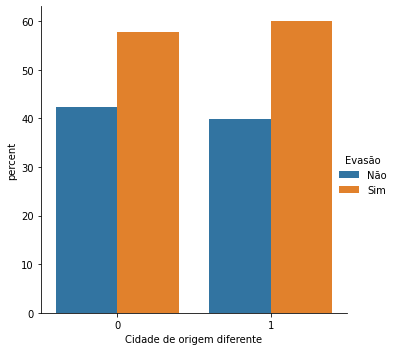

In [4]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [5]:
print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.007
0.008348589121757786


# Q.2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 2o semestre (66% vs 54%)
- A diferença é estatisticamente significativa

1    0.578343
2    0.421657
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  54.345798
1                 1      0  45.654202
2                 2      1  66.794603
3                 2      0  33.205397


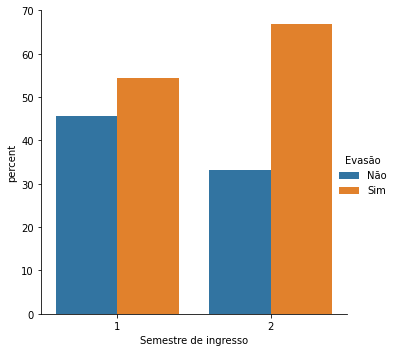

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [7]:
print('%.3f'%(proportion_test(df, 'semestreIngresso')))
print(proportion_test2(df, 'semestreIngresso'))

0.000
1.425420034549901e-71


# Q.3 Em termos gerais, a taxa de evasão é maior no 1o semestre ou 2o semestre do ano letivo? Independentemente do semestre de ingresso do estudante


- Taxa de Evasão é maior no 2o semestre letivo (66% vs 52%). Por quê? O SISU pode ser uma linha de investigação.
- A diferença é estatiscamente significativa

2    0.504193
1    0.495807
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  52.898121
1               1      0  47.101879
2               2      1  66.180333
3               2      0  33.819667


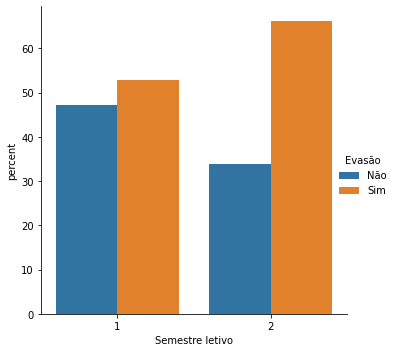

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre letivo')

In [9]:
print('%.3f'%(proportion_test(df, 'semestreLetivo')))
print(proportion_test2(df, 'semestreLetivo'))

0.000
3.3033025473410136e-83


# Q.4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (63% vs 56%).
- A diferença é estatisticamente significativa.

0    0.549164
1    0.450836
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  56.402929
1     0      0  43.597071
2     1      1  63.483085
3     1      0  36.516915


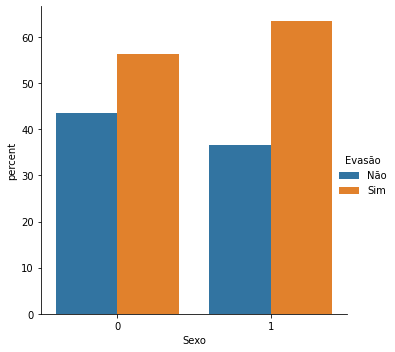

In [10]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

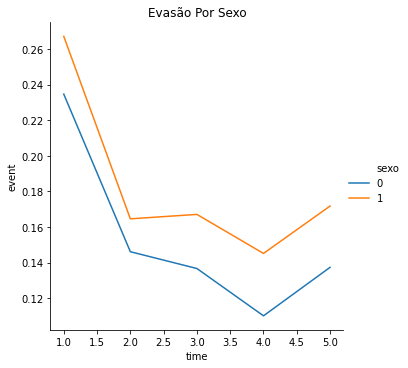

In [11]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [12]:
print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

0.000
1.1616883089289793e-24


# Q.5 Taxa de evasão decresce com o tempo?

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

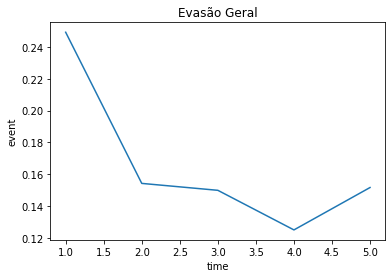

In [13]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q.6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- Taxa de evasão é maior em cotista (60% vs 58%)
- A diferença é estatisticamente significativa.

0    0.518758
1    0.481242
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  60.663642
1           0      0  39.336358
2           1      1  58.442882
3           1      0  41.557118


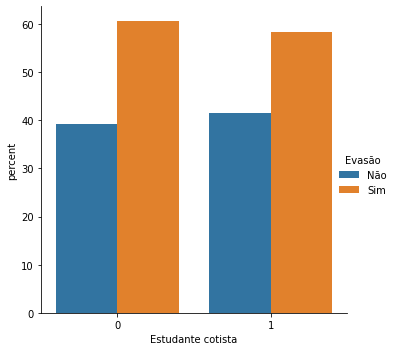

In [14]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

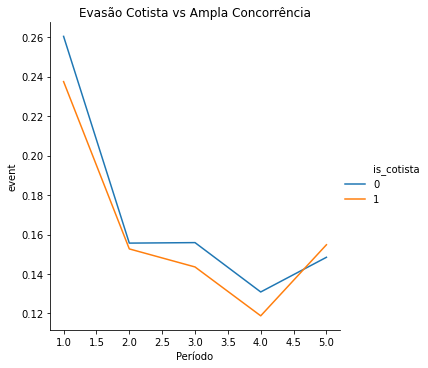

In [15]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

In [16]:
print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.001
0.0012424224011863354


# Q.7 A idade de ingresso afeta a taxa de evasão?

- A idade de ingresso não parece afetar a taxa de evasão

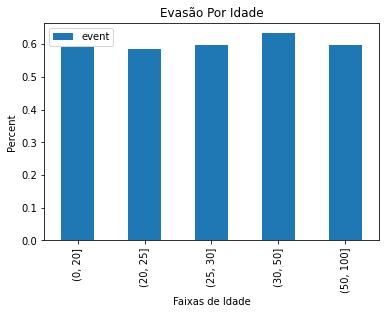

In [17]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

# Q.8 Interstício entre o término do ensino médio e o ingresso no curso afeta a evasão?

- Taxa de evasão não tende a aumentar com o aumento do interstício.

(0.0, 1.0]      0.299828
(1.0, 2.0]      0.176420
(10.0, 49.0]    0.141904
(2.0, 3.0]      0.101273
(3.0, 4.0]      0.071609
(4.0, 5.0]      0.051698
(5.0, 6.0]      0.044623
(6.0, 7.0]      0.034465
(7.0, 8.0]      0.030726
(8.0, 9.0]      0.025419
(9.0, 10.0]     0.022034
Name: gap_cat, dtype: float64


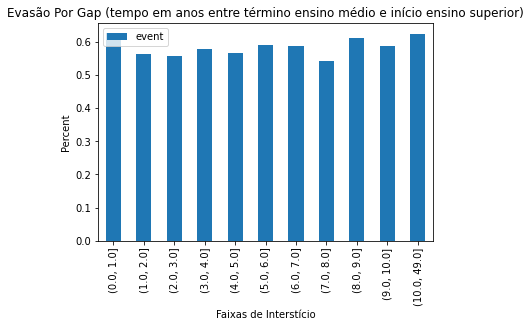

In [18]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)', xlabel='Faixas de Interstício')
plt.show()

# Turno afeta evasão?

In [7]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('turno').agg({'event':'mean'})

,event
turno,
Matutino,0.525797
Matutino e Vespertino,0.613443
Noturno,0.557080
Vespertino,0.771574


# Grau afeta evasão?

In [5]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('grau').agg({'event':'mean'})

,event
grau,
Bacharelado,0.601948
Licenciatura,0.582371
Tecnológico,0.589059
